# Analysis of the dataset: Wild_horses

In [1]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import os
import json
from utils import plot_names

%matplotlib inline

## Load annotations
This section is the same for all datasets. 

Update `dataDir` with the location of the data.

In [2]:
species = 'wildhorses'
dataDir='/home/olga/Documents/Datasets/WildMe/{}.coco/coco'.format(species)
dataType= 'test2021' #'test2020' #'train2020'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

#  Uncomment the line below if the data has been cleaned previously, use cleaned file
#annFile='{}/annotations/instances_{}_cleaned.json'.format(dataDir,dataType)

Initialize COCO api for instance annotations:

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Display COCO categories and supercategories:

In [4]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
horse_wild horse_wild+face

COCO supercategories: 
animal


Load and display instance annotations:

{'license': 3, 'file_name': '000000000395.jpg', 'photographer': '', 'coco_url': None, 'height': 1615, 'width': 2400, 'date_captured': 'NA', 'gps_lat_captured': '-1.000000', 'gps_lon_captured': '-1.000000', 'flickr_url': None, 'id': 395, 'uuid': '732e9e97-a165-2ed1-45f6-549f15ceed96'}
Name: Steener #3920 Viewpoint: left


[{'bbox': [620.0, 382.5, 1357.5, 900.0],
  'theta': 0.0,
  'viewpoint': 'left',
  'segmentation': [[620, 382, 1978, 382, 1978, 1282, 620, 1282, 620, 382]],
  'segmentation_bbox': [620, 382, 1358, 900],
  'area': 1222200,
  'iscrowd': 0,
  'id': 395,
  'image_id': 395,
  'category_id': 0,
  'uuid': '82b90acf-02b8-482b-90d8-f667e329cf69',
  'individual_ids': [394, 392, 395, 393, 391, 390, 94, 95, 96],
  'isinterest': 0,
  'name': 'Steener #3920'}]

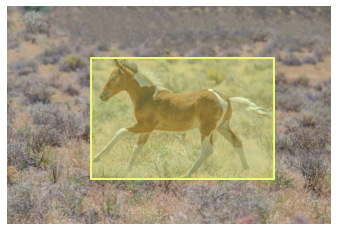

In [5]:
catIds = coco.getCatIds(catNms=nms);
imgIds = coco.getImgIds(catIds=catIds);

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)

I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print('Name: {} Viewpoint: {}'.format(anns[0]['name'], anns[0]['viewpoint']))
coco.showAnns(anns)
anns

In [6]:
print('Total number of annotations: {}'.format(len(coco.getAnnIds(imgIds))))

Total number of annotations: 614


Let's check number of annotations per category.

In [7]:
cats

[{'id': 0, 'name': 'horse_wild', 'supercategory': 'animal'},
 {'id': 1, 'name': 'horse_wild+face', 'supercategory': 'animal'}]

In [8]:
for cat in cats:
    num_cat = len(coco.getAnnIds(catIds=cat['id']))
    print('Category: {} Number of annotations: {}'.format(cat['name'], num_cat))

Category: horse_wild Number of annotations: 299
Category: horse_wild+face Number of annotations: 315


## Analyse horse face annotations

Re-id will be done separately for body and face. Let's look into face annotations first.

In [9]:
cat_id = 1
face_anns = coco.loadAnns(coco.getAnnIds(catIds=cat_id))
ids_anns = np.array([ann['id'] for ann in face_anns])
views_anns = np.array([ann['viewpoint'] for ann in face_anns])

views, views_counts = np.unique(views_anns, return_counts=True)
views, views_counts

(array(['front'], dtype='<U5'), array([315]))

So, all face images have the same viewpoint annotation `front`

Let's look into full body annotations, category id=0:

In [10]:
cat_id = 0
face_anns = coco.loadAnns(coco.getAnnIds(catIds=cat_id))
ids_anns = np.array([ann['id'] for ann in face_anns])
views_anns = np.array([ann['viewpoint'] for ann in face_anns])

views, views_counts = np.unique(views_anns, return_counts=True)
views, views_counts

(array(['left'], dtype='<U4'), array([299]))

As all body annotations have viewpoint 'left' and all face annotations have viewpoint 'front', we can use viewpoint attribute to learn id.

Let's look at the whole dataset:

In [11]:
all_anns = coco.loadAnns(coco.getAnnIds())
ids_anns = np.array([ann['id'] for ann in all_anns])
views_anns = np.array([ann['viewpoint'] for ann in all_anns])

views, views_counts = np.unique(views_anns, return_counts=True)
views, views_counts

(array(['front', 'left'], dtype='<U5'), array([315, 299]))

Plot bar chart:

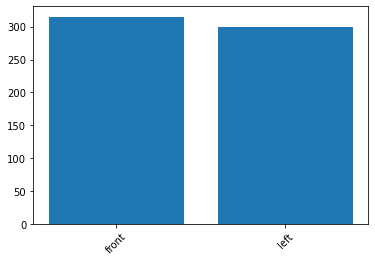

In [12]:
plt.bar(views, views_counts)
plt.xticks(rotation=45)
plt.show()

## Analyse names

Collect `name` annotation, select unique names and compute how many annotations per name.

In [13]:
names_anns = np.array([ann['name'] for ann in all_anns])
names, names_count = np.unique(names_anns, return_counts=True)
print('Found {} unique names'.format(len(names)))

Found 139 unique names


Plot bar chart:

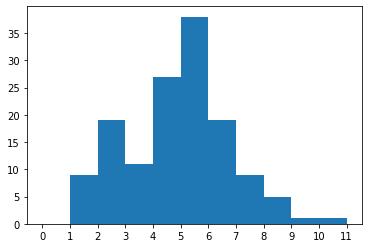

In [14]:
bins = list(range(12))
plt.hist(names_count, bins=bins)
plt.xticks(bins)
plt.show()

In [15]:
names

array(['Abigail #4736', 'Abilene #3274', 'Agareo #3320', 'Angela #141',
       'Appy #64', 'Astro #4746', 'Auggie #3578', 'Belleza #1265',
       'Black Hawk #2687', 'Bladen #3128', 'Bladen 3128', 'Blanche #379',
       'Blue Eyed Jack', 'Blue Eyed Jack #969', 'Boaz #1134',
       'Bosco #3556', 'Bosco #3956', 'Boston #143', 'Camilla #4757',
       'Carl #384', 'Caspian #3041', 'Cece #4760', 'Chaos #1543',
       'Charmer #3366', 'Chestnut #375', 'Christine #386',
       'Cloud Dancer #6513', 'Creed #3359', 'Creme Brule # 429',
       'Creme Brule #429', 'Cutie Pie #2553', 'DIXIE #124', 'Daz #3130',
       'Devi #4595', 'Dorado #1572', 'Dustin #3978', 'Elon #3646',
       'Faline #4650', 'Finnegan #4735', 'Flashy #2765', 'Fly  #2651',
       'Fly #2661', 'Freckles #156', 'Funny Face #100', 'Ghost #4445',
       'Gipsy Rose #4516', 'Gizmo #4114', 'Gracen #4771',
       'Grey Mare #171', 'Grey mare #171', 'Halflight #1473',
       'Hawk MT #1218', 'IBEIS_UNKNOWN_0132', 'IBEIS_UNKNOWN_013

Get an array of filenames and bounding boxes for display purposes:

In [16]:
filenames = np.array([coco.loadImgs(ann['image_id'])[0]['file_name'] for ann in all_anns])
filenames = np.array(['%s/images/%s/%s'%(dataDir,dataType,f) for f in filenames])

bboxes = np.array([ann['segmentation_bbox'] for ann in all_anns])

Print images for a random name (new name is displayed every time the cell is executed):

Found 5 annots for name Ronnie #3980


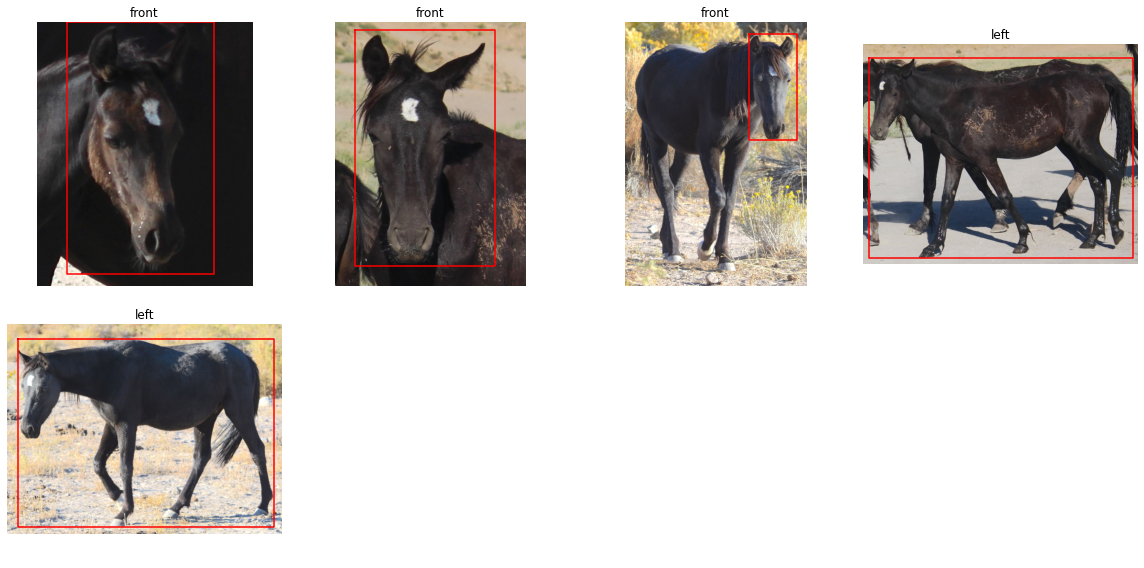

In [17]:
plot_names(names_anns, filenames, bboxes, views_anns, crop=False, max_display=16, ncols=4, ratio=(4,4))

## Analyse combination name + viewpoint

Create new identity labels by concatenating `name` and `viewpoint`.

In [18]:
name_view_anns = np.array(['{}_{}'.format(n, v) for n, v in zip(names_anns, views_anns)])

name_views, name_views_count = np.unique(name_view_anns, return_counts=True)
print('Found {} unique name_views'.format(len(name_views)))

Found 240 unique name_views


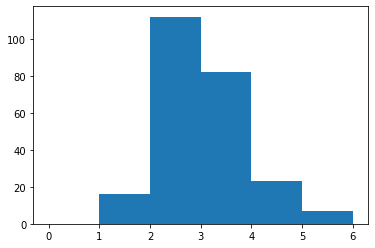

In [19]:
bins = list(range(7))
plt.hist(name_views_count, bins=bins)
plt.xticks(bins)
plt.show()

In [20]:
for num in range(1, 7):
    print('{} names have {} image'.format((name_views_count == num).sum(), num))

16 names have 1 image
112 names have 2 image
82 names have 3 image
23 names have 4 image
6 names have 5 image
1 names have 6 image


Found 2 annots for name Finnegan #4735_left


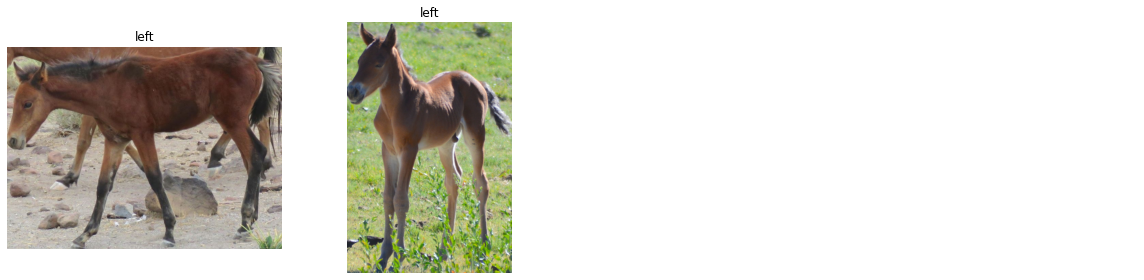

In [21]:
plot_names(name_view_anns, filenames, bboxes, views_anns, crop=True, max_display=16, ncols=4, ratio=(4,4))

## Plot all test images

The dataset is small. Let's select for testing horse with 1 and 2 images per name.
Let's check visually that test images are different enough to avoid learning any bias (e.g., background).

Found 2 annots for name Abigail #4736_front


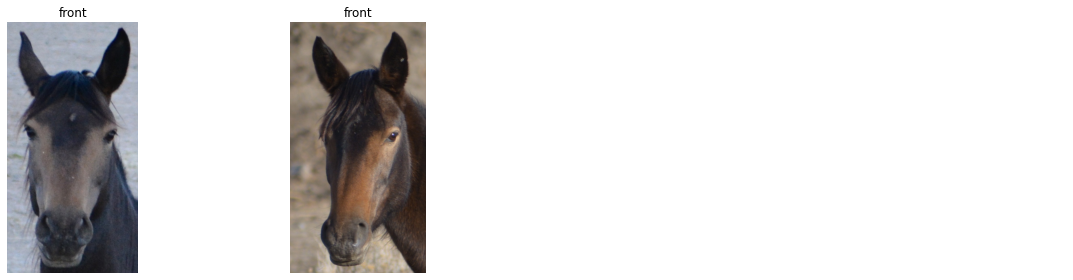

Found 2 annots for name Appy #64_front


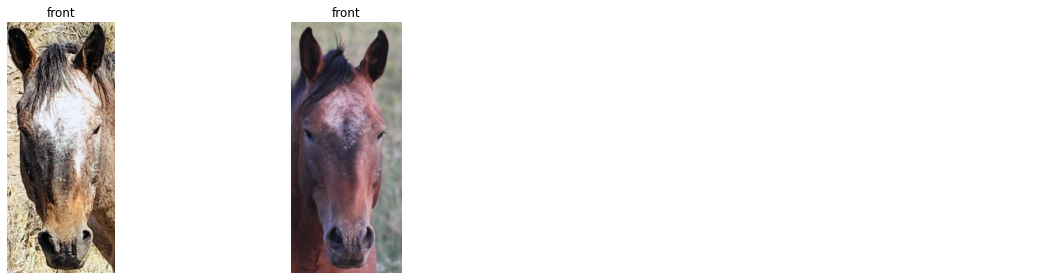

Found 2 annots for name Belleza #1265_front


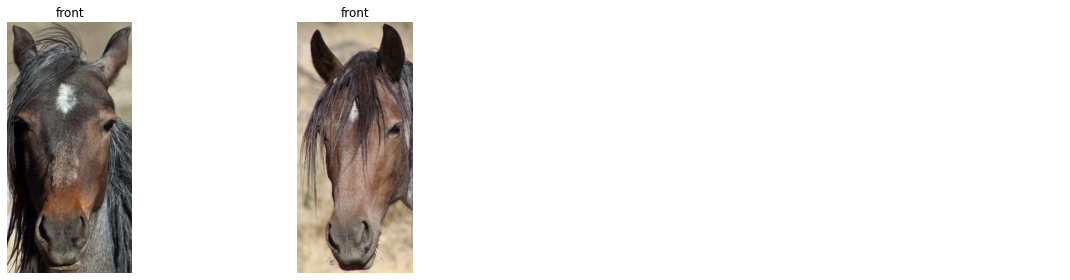

Found 2 annots for name Bosco #3956_front


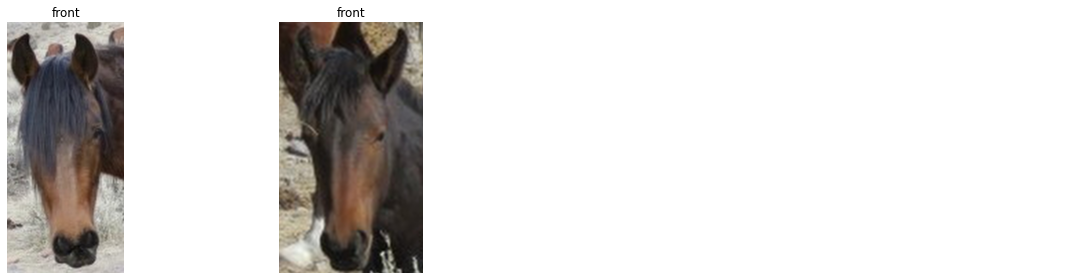

Found 2 annots for name Boston #143_front


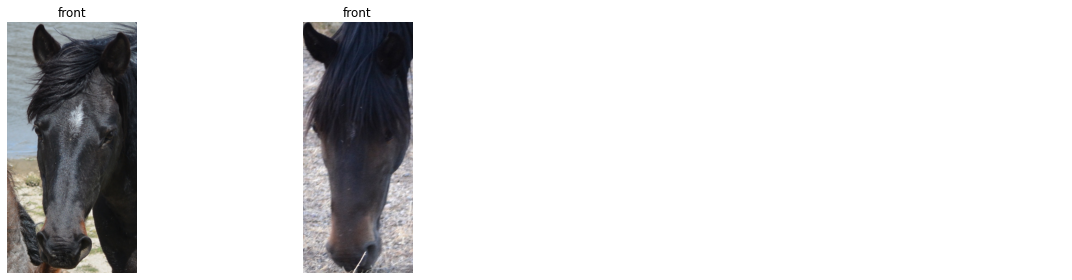

Found 2 annots for name Camilla #4757_front


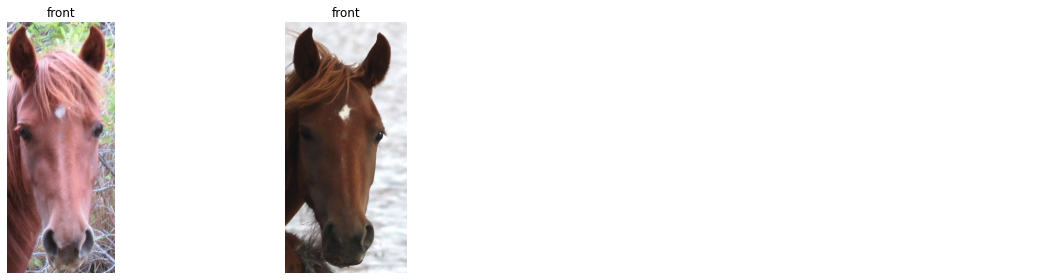

Found 2 annots for name Carl #384_front


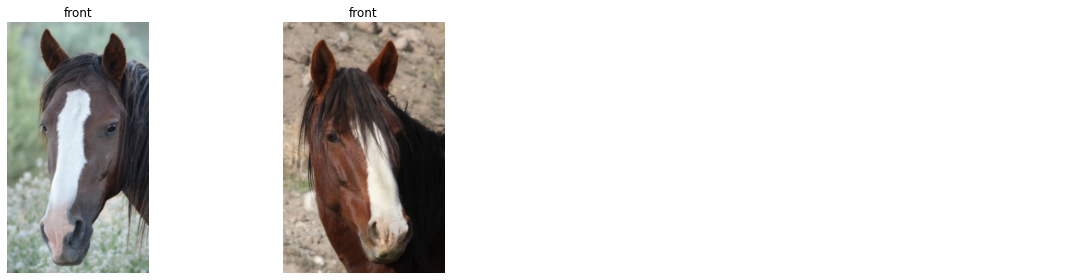

Found 2 annots for name Caspian #3041_front


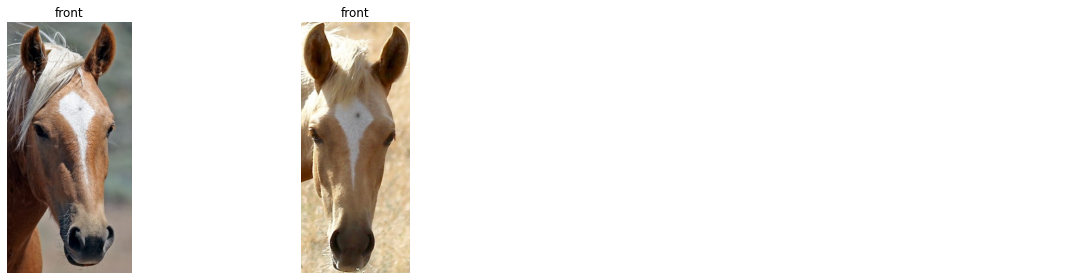

Found 2 annots for name Charmer #3366_front


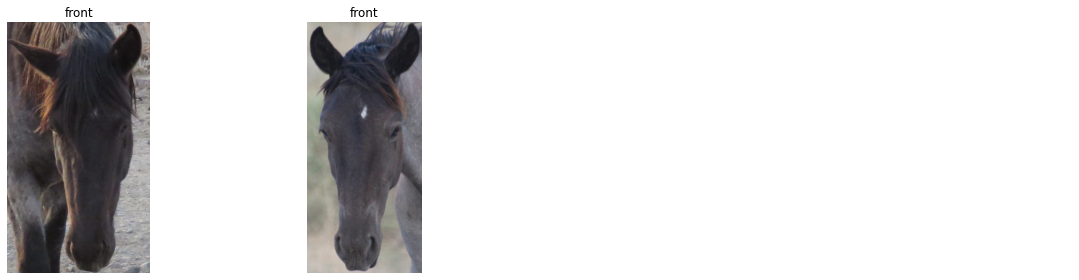

Found 2 annots for name Christine #386_front


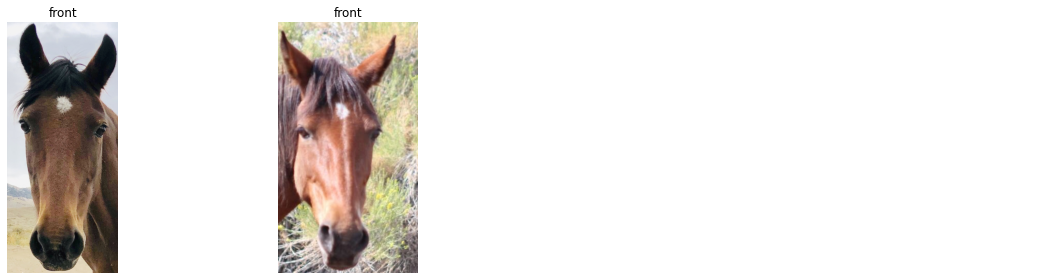

Found 2 annots for name Creed #3359_front


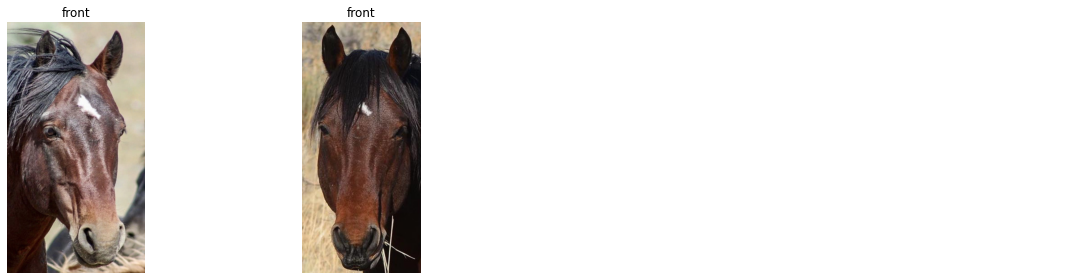

Found 2 annots for name Creme Brule # 429_front


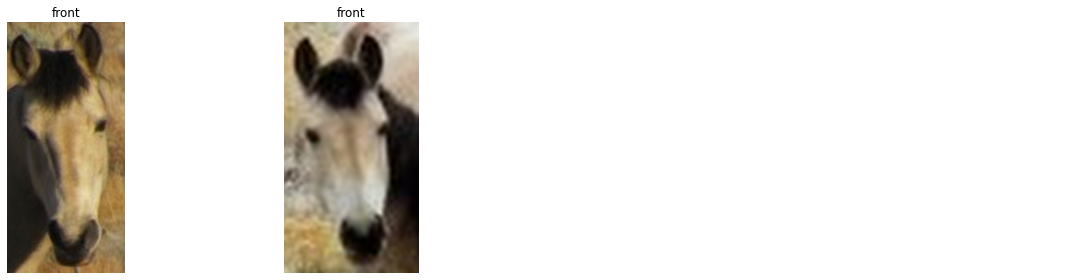

Found 2 annots for name Devi #4595_front


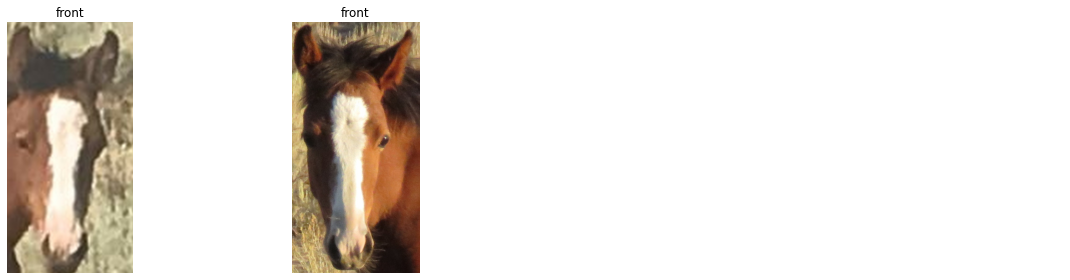

Found 2 annots for name Dustin #3978_front


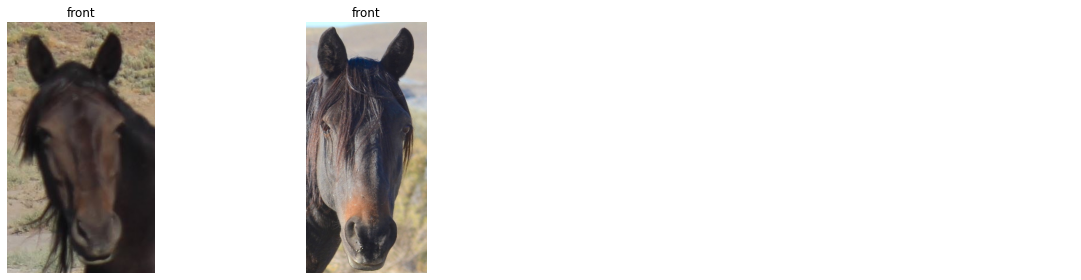

Found 2 annots for name Finnegan #4735_front


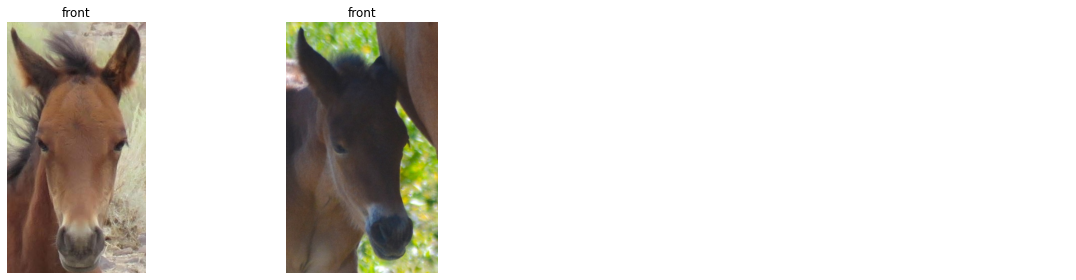

Found 2 annots for name Fly  #2651_front


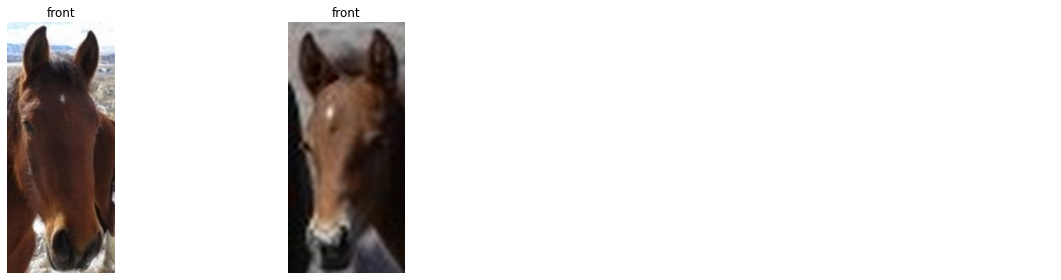

Found 2 annots for name Freckles #156_front


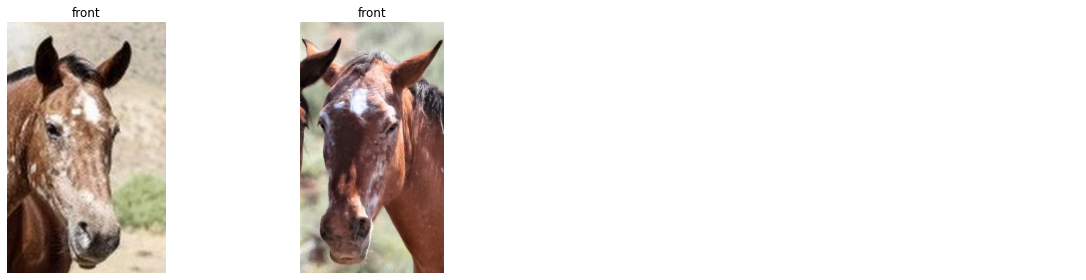

Found 2 annots for name Gipsy Rose #4516_front


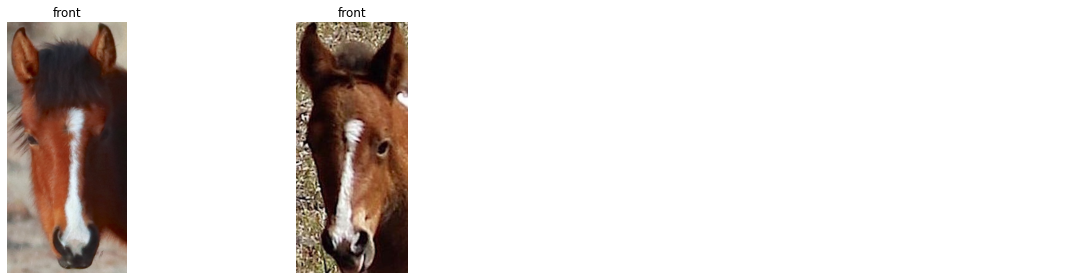

Found 2 annots for name Halflight #1473_front


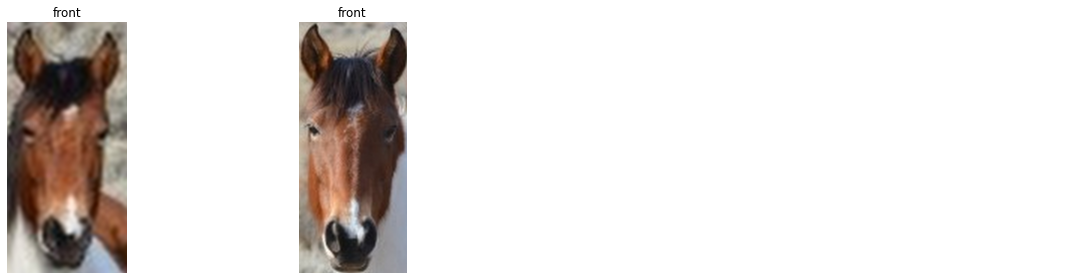

Found 2 annots for name Hawk MT #1218_front


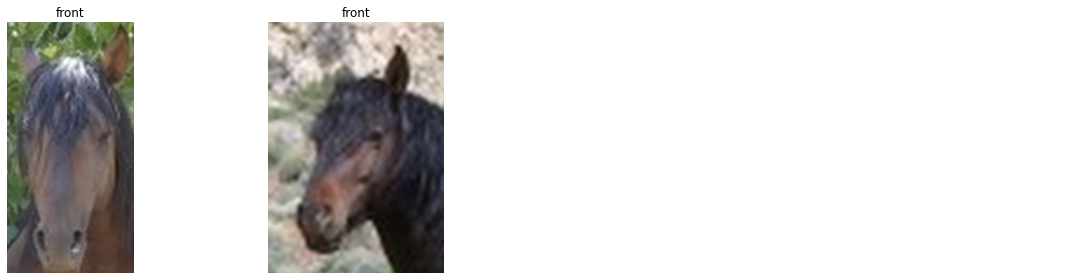

Found 2 annots for name Jigsaw # 3273_front


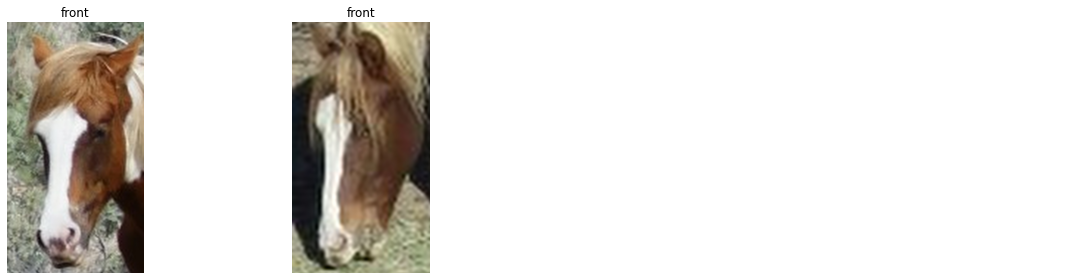

Found 2 annots for name Jimmy Dean #4836_front


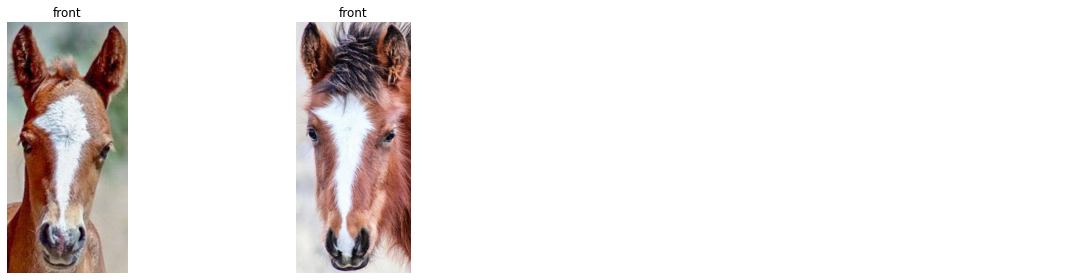

Found 2 annots for name Kite #1346_front


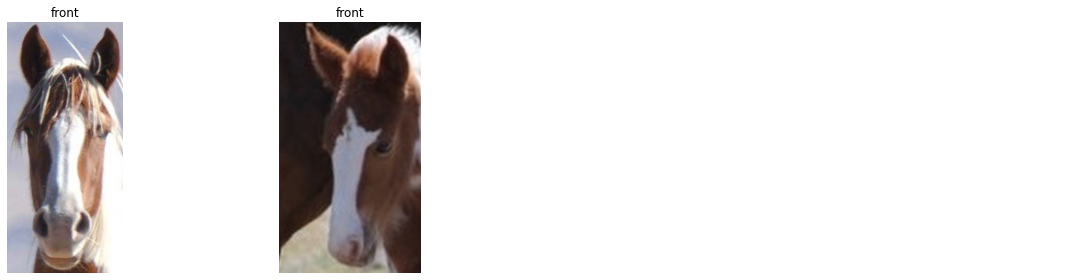

Found 2 annots for name Koshi #1500_front


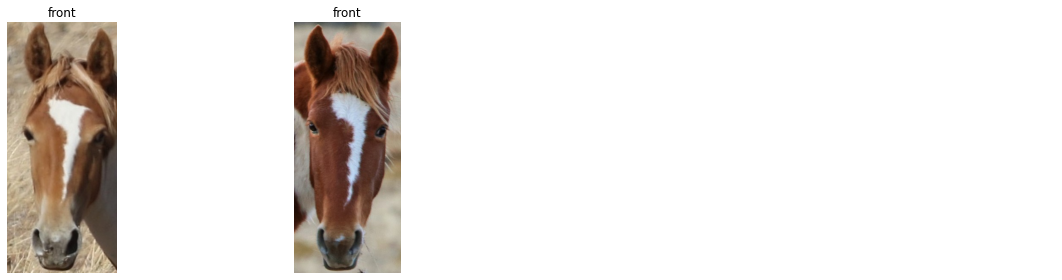

Found 2 annots for name Legolas #2613_front


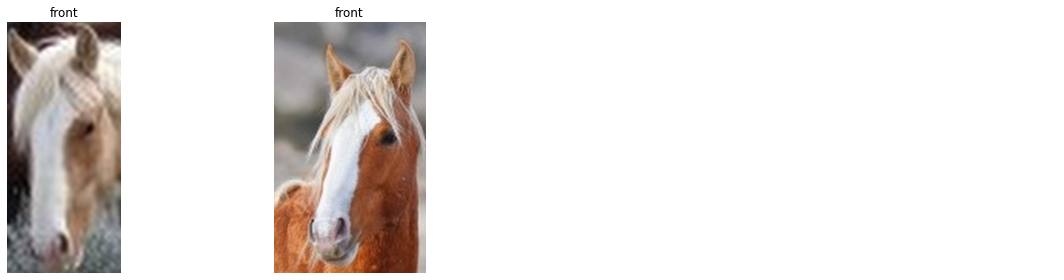

Found 2 annots for name Lolly #5201_front


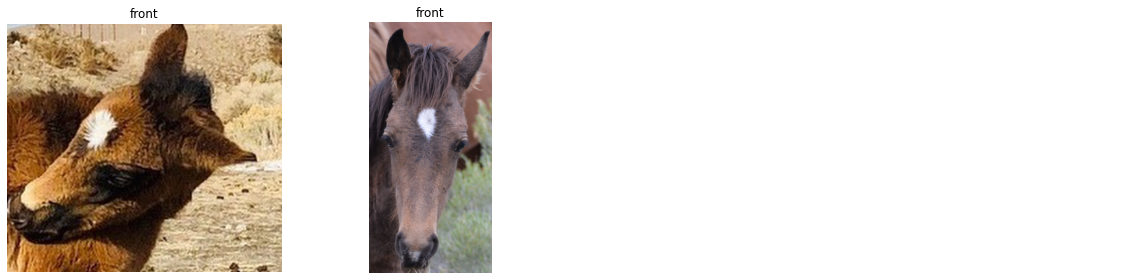

Found 2 annots for name Marisol #5042_front


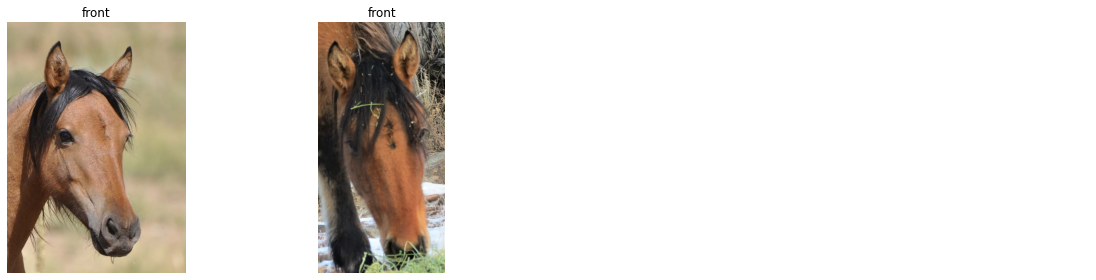

Found 2 annots for name Mary Jane #1223_front


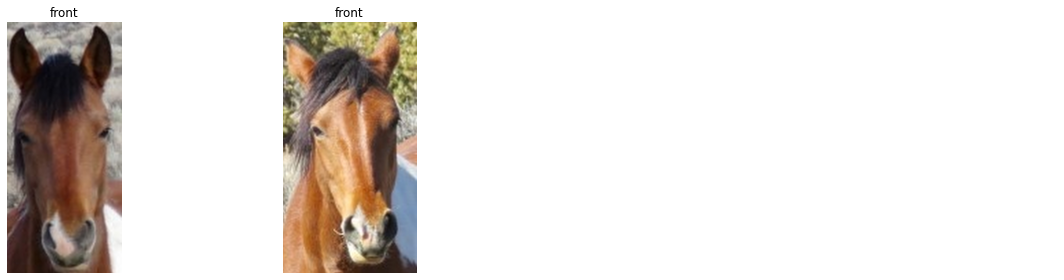

Found 2 annots for name Melbourne #4723_front


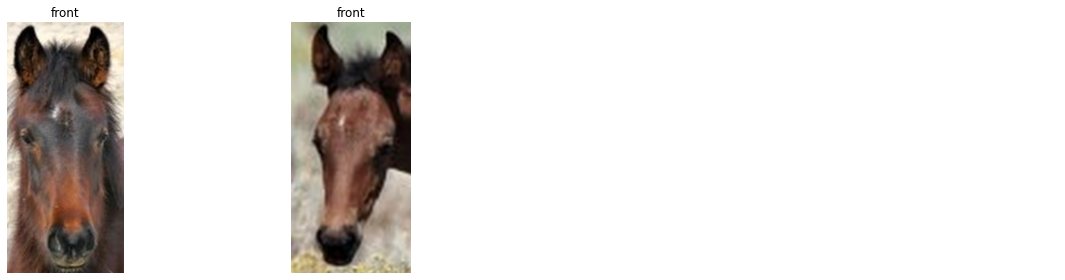

Found 2 annots for name Mercy  #2984_front


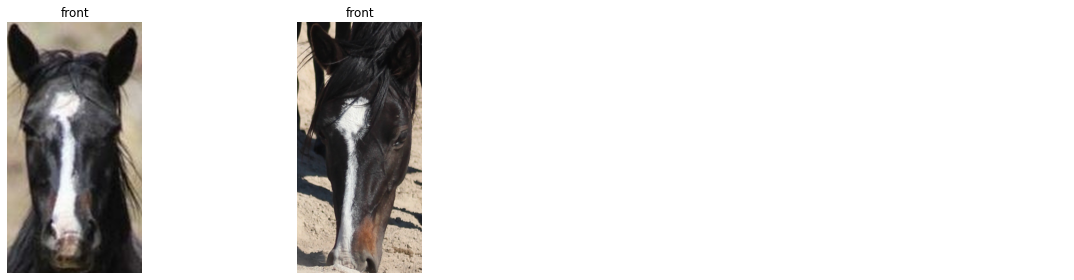

Found 2 annots for name Milo #1339_front


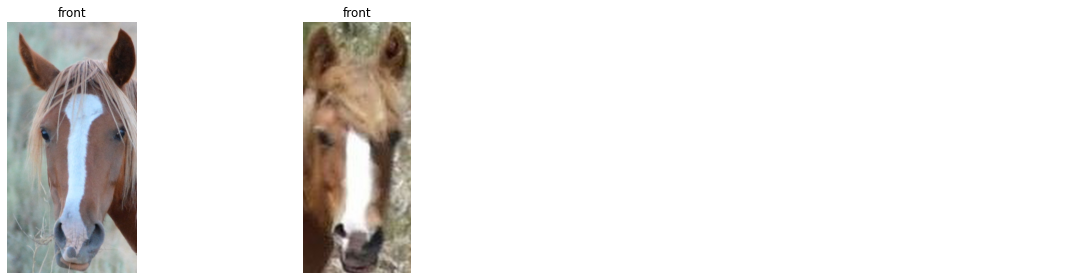

Found 2 annots for name Molassis #966_front


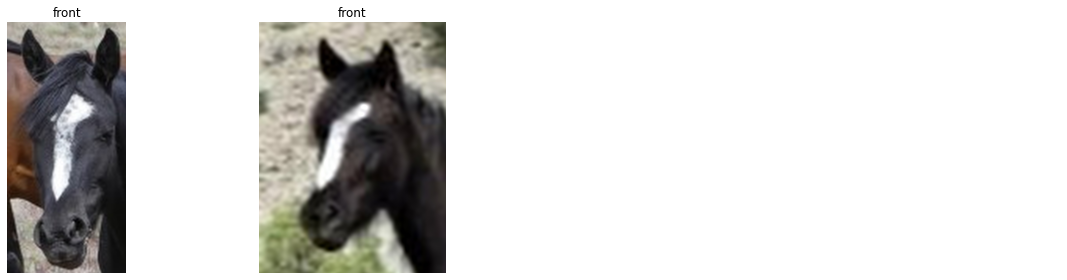

Found 2 annots for name Moonshine #3473_front


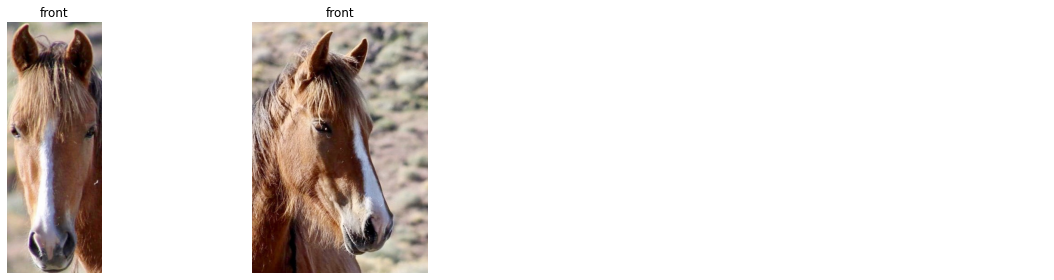

Found 2 annots for name Nadia #3196_front


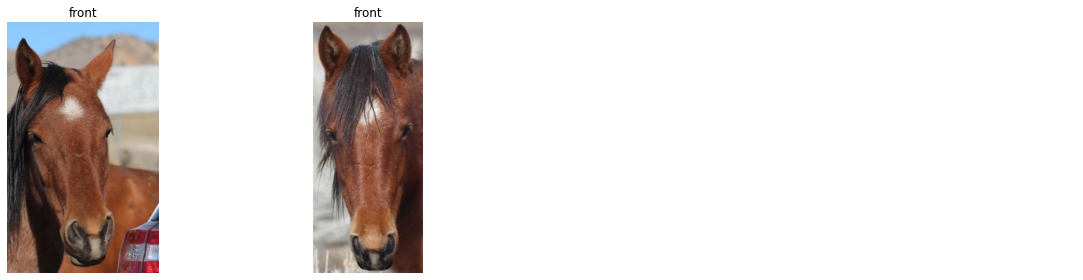

Found 2 annots for name Omar #88_front


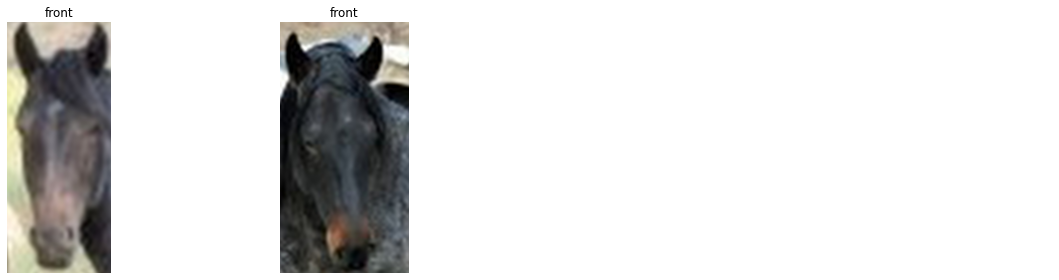

Found 2 annots for name Rapunzel #2740_front


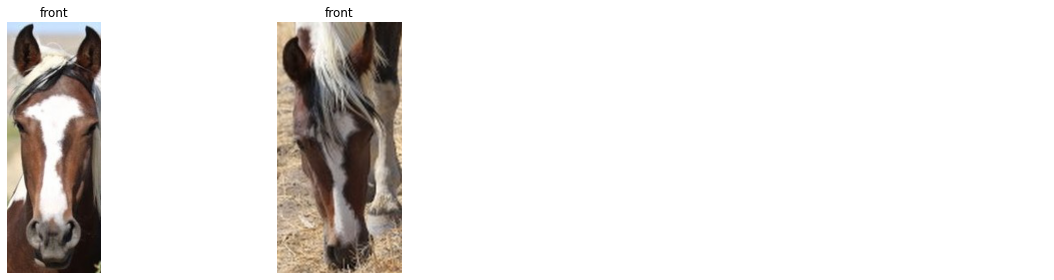

Found 2 annots for name Red Chief #1177_front


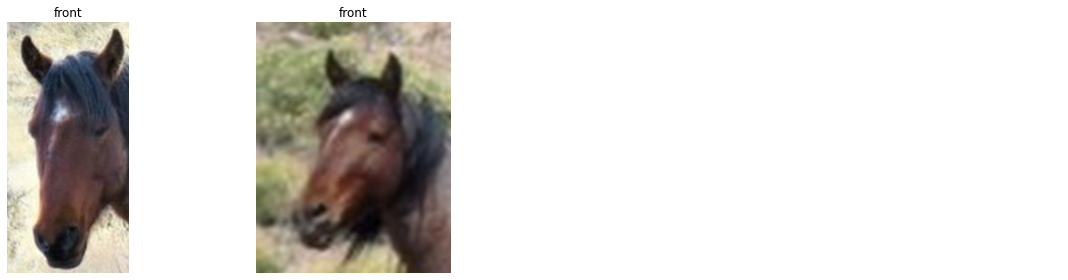

Found 2 annots for name Remington #1045_front


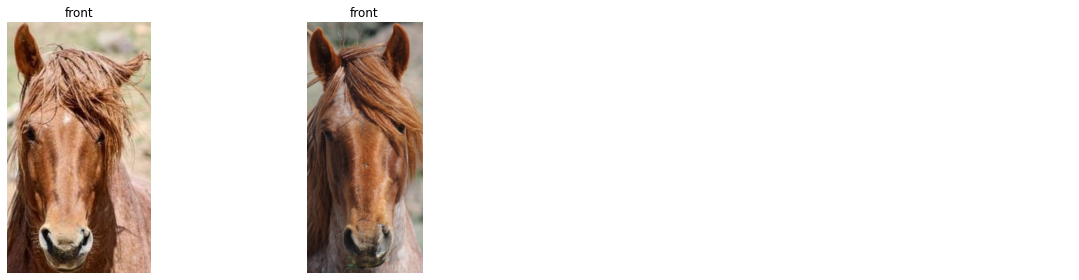

Found 2 annots for name Rohan #1565_front


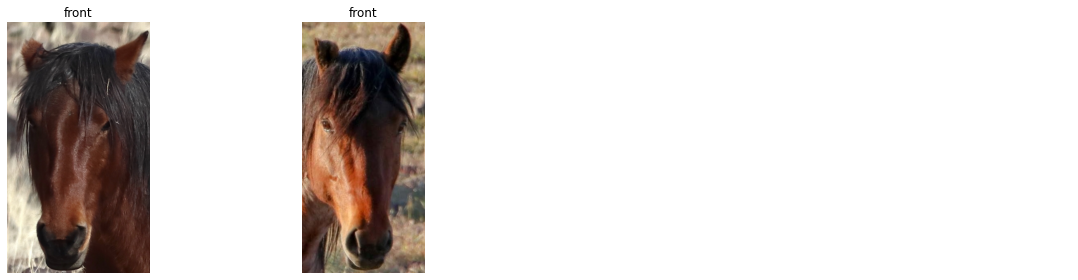

Found 2 annots for name Rose Bud #1046_front


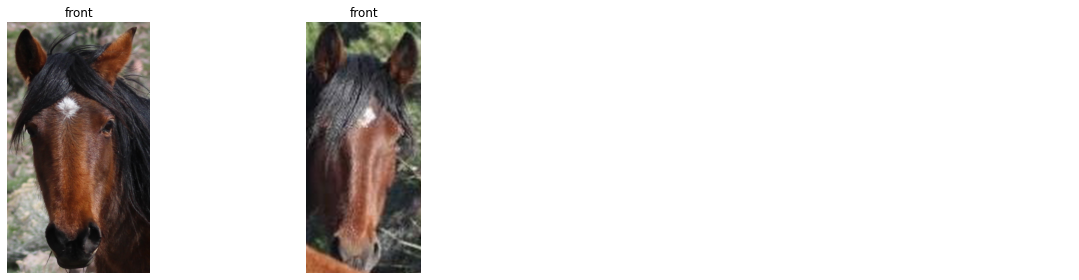

Found 2 annots for name Sahara #2709_front


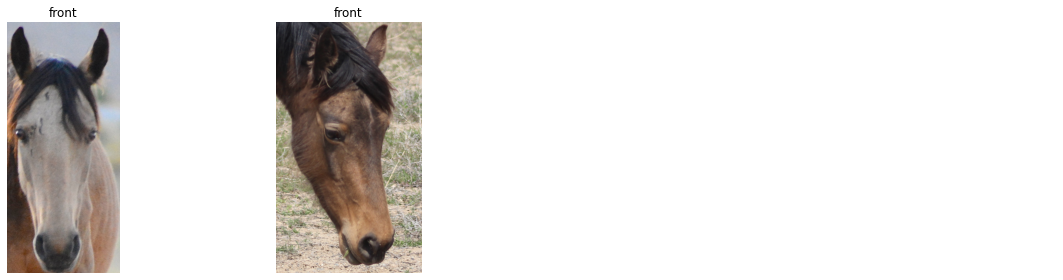

Found 2 annots for name Sunrunner #1212_front


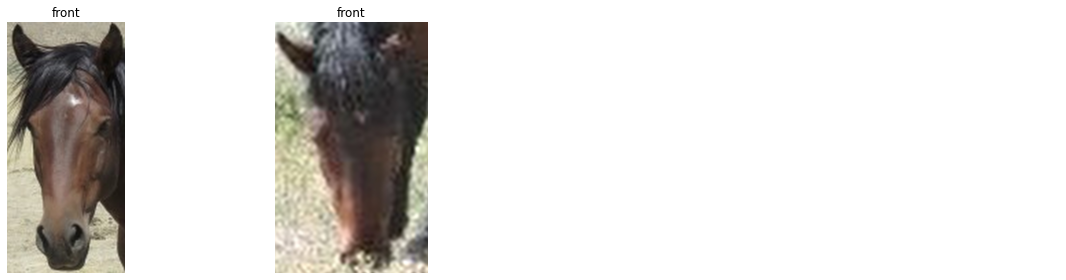

Found 2 annots for name Ta-da #5415_front


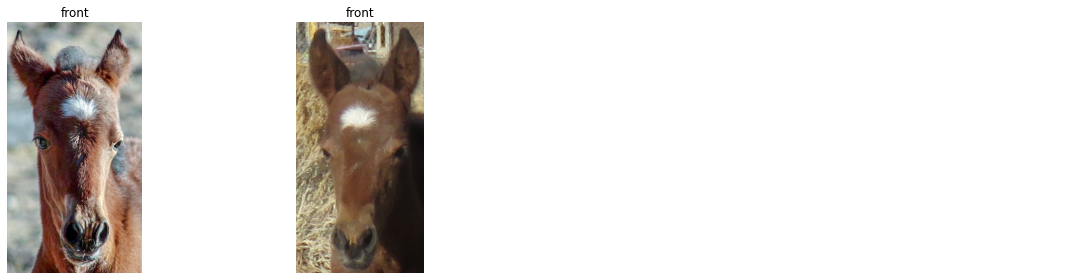

Found 2 annots for name Zelda #1220_front


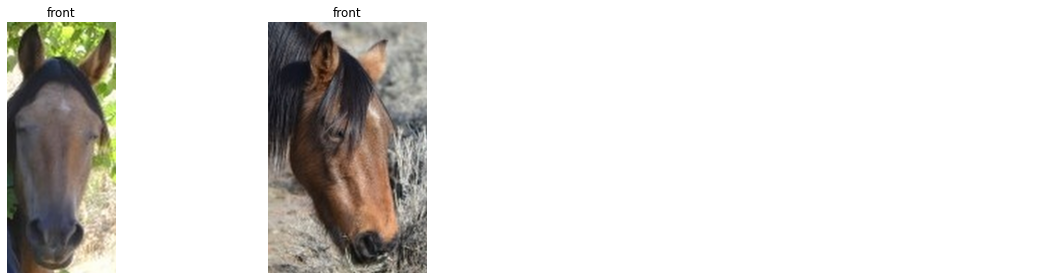

In [26]:
for name, count in zip(name_views, name_views_count):
    if 'front' in name and count == 2:
        plot_names(name_view_anns, filenames, bboxes, views_anns, crop=True, max_display=16, ncols=4, ratio=(4,4),
                  name=name)
        plt.show()